<a href="https://colab.research.google.com/github/fadeevie/Canny_filter/blob/main/Canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Импорт библиотек**

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

**Определение алгоритма Canny**

In [7]:
def Canny_detector(img, weak_th = None, strong_th = None):

	# Преобразование изображения в оттенки серого
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

	# Сглаживание изображения
	img = cv2.GaussianBlur(img, (7, 7), 1.4)

	# Вычисление градиентов
	gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
	gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

	# Преобразование декартовых координат в полярные
	mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)

  # Установка минимальных и максимальных порогов для двойного порогового значения
	mag_max = np.max(mag)
	if not weak_th:weak_th = mag_max * 0.1
	if not strong_th:strong_th = mag_max * 0.5

	# Получение размеров входного изображения
	height, width = img.shape

	# Проход по каждому пикселю изображения
	for i_x in range(width):
		for i_y in range(height):

			grad_ang = ang[i_y, i_x]
			grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)

			# Цикл проходит по каждому пикселю изображения, чтобы выполнить подавление немаксимальных значений,
      # что важно для тонкого выделения краев
			if grad_ang <= 22.5:
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y

			elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
				neighb_1_x, neighb_1_y = i_x-1, i_y-1
				neighb_2_x, neighb_2_y = i_x + 1, i_y + 1

			elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
				neighb_1_x, neighb_1_y = i_x, i_y-1
				neighb_2_x, neighb_2_y = i_x, i_y + 1

			elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
				neighb_1_x, neighb_1_y = i_x-1, i_y + 1
				neighb_2_x, neighb_2_y = i_x + 1, i_y-1

			elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y

			if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
				if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
					mag[i_y, i_x]= 0
					continue

			if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
				if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
					mag[i_y, i_x]= 0

  # Создание пустых матриц, для хранения результатов
	weak_ids = np.zeros_like(img)
	strong_ids = np.zeros_like(img)
	ids = np.zeros_like(img)

	for i_x in range(width):
		for i_y in range(height):

			grad_mag = mag[i_y, i_x]

			if grad_mag<weak_th:
				mag[i_y, i_x]= 0
			elif strong_th>grad_mag>= weak_th:
				ids[i_y, i_x]= 1
			else:
				ids[i_y, i_x]= 2

	return mag

**Чтение изображения**

In [8]:
frame = cv2.imread('/content/ph.jpg')

# Вызов функции
canny_img = Canny_detector(frame)

**Визуализация исходного и обработанного изображений**

<Figure size 640x480 with 0 Axes>

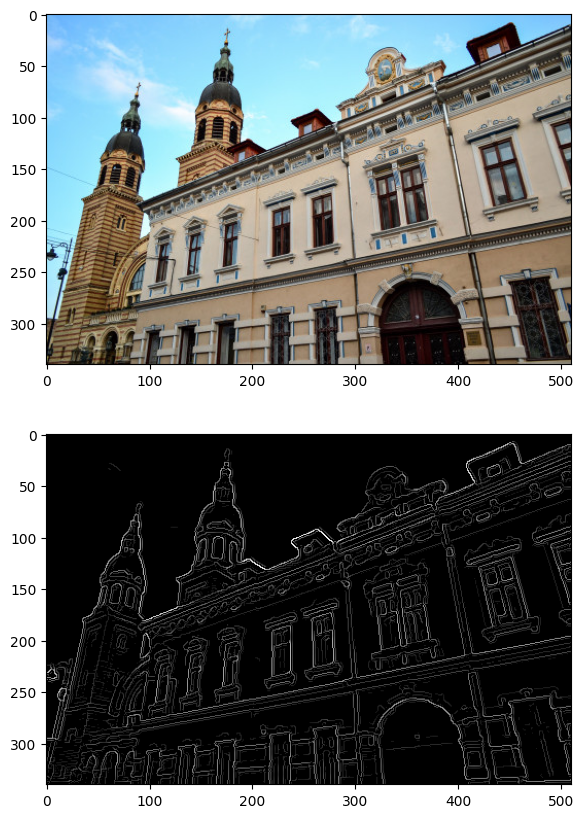

In [13]:
# Преобразование изображения в формат RGB для корректного отображения
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Визуализация
plt.figure()
f, plots = plt.subplots(2, 1, figsize=(12, 10))
plots[0].imshow(frame_rgb)
plots[1].imshow(canny_img, cmap='gray')
plt.show()